In [1]:
import os
import time
import uuid
import cv2

In [2]:
# !pip3 install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

In [2]:
import tensorflow as tf
import json
import numpy as np
# !pip3 install matplotlib
from matplotlib import pyplot as plt

2024-05-21 21:30:55.335503: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 21:30:56.168395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[]

2.3 Load Image into TF Data Pipeline

In [6]:
images = tf.data.Dataset.list_files('train_data/21bcs001/*.jpg')


tensorflow.python.data.ops.map_op._MapDataset

In [9]:
images.as_numpy_iterator().next()

array([[[230, 213, 205],
        [230, 213, 205],
        [231, 214, 206],
        ...,
        [232, 219, 211],
        [233, 220, 212],
        [232, 219, 211]],

       [[231, 214, 206],
        [231, 214, 206],
        [231, 214, 206],
        ...,
        [233, 220, 212],
        [233, 220, 212],
        [233, 220, 212]],

       [[232, 215, 207],
        [232, 215, 207],
        [232, 215, 207],
        ...,
        [233, 220, 212],
        [233, 220, 212],
        [233, 220, 212]],

       ...,

       [[ 41,  58,  50],
        [ 42,  59,  51],
        [ 40,  60,  51],
        ...,
        [ 35,  58,  52],
        [ 35,  58,  52],
        [ 35,  58,  52]],

       [[ 41,  58,  50],
        [ 42,  59,  51],
        [ 41,  61,  52],
        ...,
        [ 36,  59,  53],
        [ 35,  58,  52],
        [ 36,  59,  53]],

       [[ 40,  57,  49],
        [ 40,  57,  49],
        [ 40,  60,  51],
        ...,
        [ 37,  60,  54],
        [ 35,  58,  52],
        [ 35,  58,  52]]

In [10]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [11]:
images = images.map(load_image)

TypeError: in user code:

    File "/tmp/ipykernel_37066/2470288393.py", line 2, in load_image  *
        byte_img = tf.io.read_file(x)

    TypeError: Input 'filename' of 'ReadFile' Op has type uint8 that does not match expected type of string.


In [12]:
images.as_numpy_iterator().next()

array([[[236, 219, 209],
        [236, 219, 209],
        [236, 219, 209],
        ...,
        [238, 224, 215],
        [238, 224, 215],
        [239, 225, 216]],

       [[236, 219, 209],
        [236, 219, 209],
        [236, 219, 209],
        ...,
        [238, 224, 215],
        [239, 225, 216],
        [239, 225, 216]],

       [[236, 219, 209],
        [236, 219, 209],
        [236, 219, 209],
        ...,
        [239, 225, 216],
        [239, 225, 216],
        [239, 225, 216]],

       ...,

       [[ 35,  56,  51],
        [ 34,  55,  50],
        [ 34,  53,  49],
        ...,
        [197, 170, 149],
        [195, 169, 146],
        [194, 168, 145]],

       [[ 32,  53,  48],
        [ 30,  51,  46],
        [ 31,  50,  46],
        ...,
        [197, 170, 149],
        [195, 168, 147],
        [195, 168, 147]],

       [[ 30,  51,  46],
        [ 28,  49,  44],
        [ 30,  49,  45],
        ...,
        [196, 169, 148],
        [196, 169, 148],
        [196, 169, 148]]

In [13]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

2.4 View Raw Images with Matplotlib

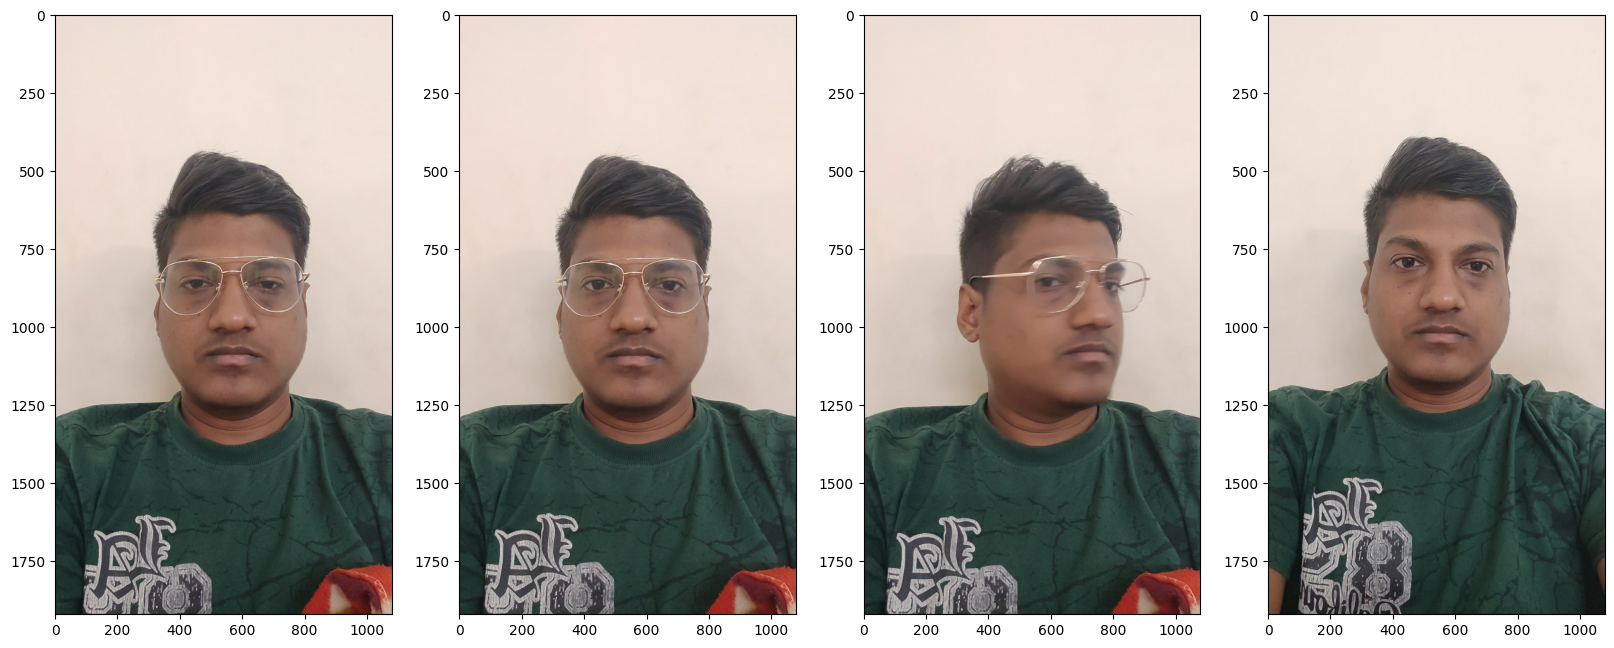

In [7]:
image_generator = images.batch(4).as_numpy_iterator()
plot_images = image_generator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()